## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
common_emotions=pd.read_csv("common_emotion_source.csv")

In [47]:
def get_emotion_count(common_emotions):
    df_emotions=common_emotions[["Source","Emotions"]].value_counts().reset_index().sort_values(by="Source")\
    .reset_index(drop=True)
    df_emotions.columns=['Source', 'Emotions','Count']
    return df_emotions
df_emotions = get_emotion_count(common_emotions)

In [48]:
df_emotions.Emotions.unique()

array(['disgust', 'fear', 'happy', 'neutral', 'angry', 'sad'],
      dtype=object)

<AxesSubplot:xlabel='Emotions', ylabel='Count'>

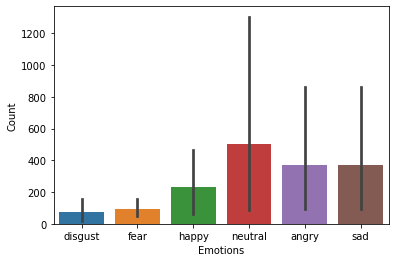

In [29]:
sns.barplot(data=df_emotions,x="Emotions",y="Count")   


In [30]:
# Emotions to select - 
emotions_selected = ['happy', 'neutral', 'angry', 'sad']

In [31]:
df_emotions = df_emotions[df_emotions["Emotions"].isin(emotions_selected)]

<AxesSubplot:xlabel='Source', ylabel='Count'>

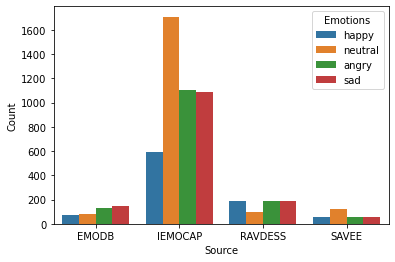

In [32]:
sns.barplot(data=df_emotions,x="Source",y="Count",hue="Emotions")   


In [33]:
df_emotions[df_emotions["Source"]=="IEMOCAP"]

,Source,Emotions,Count
6,IEMOCAP,neutral,1708
9,IEMOCAP,happy,595
10,IEMOCAP,sad,1084
11,IEMOCAP,angry,1103


In [34]:
df_emotions[df_emotions["Source"]=="EMODB"]

,Source,Emotions,Count
2,EMODB,happy,71
3,EMODB,neutral,79
4,EMODB,angry,127
5,EMODB,sad,143


In [35]:
df_emotions[df_emotions["Source"]=="SAVEE"]

,Source,Emotions,Count
18,SAVEE,angry,60
21,SAVEE,happy,60
22,SAVEE,sad,60
23,SAVEE,neutral,120


In [36]:
max_sample ={ "IEMOCAP" : 1084,"EMODB" : 143,"SAVEE" : 60 }

In [17]:
source_min_sample ={ "IEMOCAP" : 1084,"EMODB" : 127,"SAVEE" : 60 }

In [37]:
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [38]:
common_emotions_selected = common_emotions[common_emotions["Emotions"].isin(emotions_selected)]

In [39]:
common_emotions_selected["Emotions"].value_counts()

neutral    2003
angry      1482
sad        1479
happy       918
Name: Emotions, dtype: int64

In [44]:
train_combined_data=[]
for k,v in max_sample.items():
    training_data_source = common_emotions_selected[common_emotions_selected["Source"]==k]
    for em in emotions_selected:
        emotion_data = training_data_source[training_data_source["Emotions"]==em]
        if len(emotion_data)>v:
            train_combined_data.append(emotion_data.sample(v))
        else:
            train_combined_data.append(emotion_data)

In [45]:
df_train_data = pd.concat(train_combined_data)

In [49]:
df_emotions = get_emotion_count(df_train_data)

In [50]:
df_emotions[df_emotions["Source"]=="IEMOCAP"]

,Source,Emotions,Count
4,IEMOCAP,angry,1084
5,IEMOCAP,neutral,1084
6,IEMOCAP,sad,1084
7,IEMOCAP,happy,595


In [51]:
df_emotions[df_emotions["Source"]=="EMODB"]

,Source,Emotions,Count
0,EMODB,sad,143
1,EMODB,angry,127
2,EMODB,neutral,79
3,EMODB,happy,71


In [52]:
df_emotions[df_emotions["Source"]=="SAVEE"]

,Source,Emotions,Count
8,SAVEE,angry,60
9,SAVEE,happy,60
10,SAVEE,neutral,60
11,SAVEE,sad,60


In [54]:
df_train_data["Emotions"].value_counts()

sad        1287
angry      1271
neutral    1223
happy       726
Name: Emotions, dtype: int64

In [56]:
data_sample_to_take = { "IEMOCAP" :{"happy" : 489}, "EMODB" :{"angry" : 16, "neutral" :64 , "happy" : 72}}

## Fixing Class Balance

In [59]:
augmented_data_10db=[]
augmented_data_20db=[]

for k,v in data_sample_to_take.items():
    training_data_source = common_emotions_selected[common_emotions_selected["Source"]==k]
    for ek, ev  in v.items():        
        emotion_data = training_data_source[training_data_source["Emotions"]==ek]
        count_10db_sample = ev//2
        count_20db_sample = ev-count_10db_sample
        augmented_data_10db.append(emotion_data.sample(count_10db_sample))
        augmented_data_20db.append(emotion_data.sample(count_20db_sample))

In [60]:
df_augmented_data_10db =pd.concat(augmented_data_10db)
df_augmented_data_20db =pd.concat(augmented_data_20db)

In [61]:
train_data = pd.DataFrame(columns=["emotion","source","path","augmented"])

In [70]:
df_train_data.columns

Index(['Emotions', 'Source', 'Sample Rate', 'Filename', 'Audio Length',
       'Trimmed Audio Length', 'Trimmed Resized MFCC_Path',
       'Trimmed AWGN 10db Resized MFCC_Path',
       'Trimmed AWGN 20db Resized MFCC_Path'],
      dtype='object')

In [65]:
source_train_data = df_train_data[["Emotions","Source","Trimmed Resized MFCC_Path"]]

In [67]:
source_train_data["augmented"]=0

In [68]:
source_train_data.columns =  train_data.columns

In [69]:
source_train_data.head()

,emotion,source,path,augmented
5,happy,IEMOCAP,mfcc_trimmed_resized/IEMOCAP/happy/Ses01F_scri...,0
29,happy,IEMOCAP,mfcc_trimmed_resized/IEMOCAP/happy/Ses01F_scri...,0
30,happy,IEMOCAP,mfcc_trimmed_resized/IEMOCAP/happy/Ses01F_scri...,0
31,happy,IEMOCAP,mfcc_trimmed_resized/IEMOCAP/happy/Ses01F_scri...,0
199,happy,IEMOCAP,mfcc_trimmed_resized/IEMOCAP/happy/Ses01M_impr...,0


In [71]:
aug_10db_train_data = df_augmented_data_10db[["Emotions","Source","Trimmed AWGN 10db Resized MFCC_Path"]]

In [72]:
aug_10db_train_data["augmented"]=10

In [73]:
aug_10db_train_data.columns =  train_data.columns

In [74]:
aug_20db_train_data = df_augmented_data_20db[["Emotions","Source","Trimmed AWGN 20db Resized MFCC_Path"]]
aug_20db_train_data["augmented"]=20
aug_20db_train_data.columns =  train_data.columns

In [75]:
train_data = pd.concat([source_train_data,aug_10db_train_data,aug_20db_train_data])

In [76]:
train_data.reset_index(drop=True,inplace=True)

In [78]:
train_data["emotion"].value_counts()

happy      1287
neutral    1287
angry      1287
sad        1287
Name: emotion, dtype: int64

In [82]:
train_data["source"].value_counts()

IEMOCAP    4336
EMODB       572
SAVEE       240
Name: source, dtype: int64

In [79]:
train_data.to_csv("train_data.csv",index=False)

In [80]:
## Adding more augmented data for generalization

In [89]:
aug_gen_data = []
for source in train_data["source"].unique():
    training_data_source = common_emotions_selected[common_emotions_selected["Source"]==source]
    sample_to_take = max_sample[source]//10
    for em in emotions_selected:
        emotion_data = training_data_source[training_data_source["Emotions"]==em]
        aug_10db = emotion_data[["Emotions","Source","Trimmed AWGN 10db Resized MFCC_Path"]]
        aug_10db["augmented"] = 10
        aug_10db.columns = train_data.columns
        aug_10db =  aug_10db[~aug_10db["path"].isin(train_data["path"])]
        aug_gen_data.append(aug_10db.sample(sample_to_take))
                                
        aug_20db = emotion_data[["Emotions","Source","Trimmed AWGN 20db Resized MFCC_Path"]]
        aug_20db["augmented"] = 20
        aug_20db.columns = train_data.columns
        aug_20db =  aug_20db[~aug_20db["path"].isin(train_data["path"])]
        aug_gen_data.append(aug_20db.sample(sample_to_take))

In [90]:
df_aug_gen_data = pd.concat(aug_gen_data)

In [91]:
df_aug_gen_data["emotion"].value_counts()

happy      256
neutral    256
angry      256
sad        256
Name: emotion, dtype: int64

In [92]:
df_aug_gen_data.head()

,emotion,source,path,augmented
2229,happy,IEMOCAP,mfcc_awgn_10db_trimmed_resized/IEMOCAP/happy/S...,10
2455,happy,IEMOCAP,mfcc_awgn_10db_trimmed_resized/IEMOCAP/happy/S...,10
3229,happy,IEMOCAP,mfcc_awgn_10db_trimmed_resized/IEMOCAP/happy/S...,10
3786,happy,IEMOCAP,mfcc_awgn_10db_trimmed_resized/IEMOCAP/happy/S...,10
449,happy,IEMOCAP,mfcc_awgn_10db_trimmed_resized/IEMOCAP/happy/S...,10


In [93]:
train_data = pd.concat([train_data,df_aug_gen_data])

In [94]:
train_data.reset_index(drop=True,inplace=True)

In [95]:
train_data.to_csv("train_data.csv",index=False)

In [97]:
train_data["emotion"].value_counts()

happy      1543
neutral    1543
angry      1543
sad        1543
Name: emotion, dtype: int64